# Introduction

This notebook will take a data-driven approach to generating word lists for mental functions that are related to brain circuitry. The overall process is as follows:

1. Cluster brain structures into circuits by PMI-weighted co-occurrences with mental function terms.
2. Identify the mental function terms most highly associated to each circuit over a range of list lengths.
3. Select the list length for each circuit that maximizes word-structure classification performance. 
4. Select the number of circuits that maximizes circuit-function classification performance.

# Load the data

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import utilities, ontology

In [2]:
list_suffix = "_logreg"
suffix = "_lr"

## Cluster range to visualize

In [3]:
circuit_counts = range(2, 51)

## Brain activation coordinates

In [4]:
act_bin = utilities.load_coordinates()
print("Document N={}, Structure N={}".format(
      act_bin.shape[0], act_bin.shape[1]))

Document N=18155, Structure N=118


## Terms for mental functions

In [5]:
version = 190325
dtm_bin = utilities.load_doc_term_matrix(version=version, binarize=True)

In [6]:
lexicon = utilities.load_lexicon(["cogneuro"])
lexicon = sorted(list(set(lexicon).intersection(dtm_bin.columns)))
len(lexicon)

1683

In [7]:
dtm_bin = dtm_bin[lexicon]
print("Document N={}, Term N={}".format(
      dtm_bin.shape[0], dtm_bin.shape[1]))

Document N=18155, Term N=1683


## Document splits

In [8]:
train, val = [[int(pmid.strip()) 
               for pmid in open("../data/splits/{}.txt".format(split))] 
                    for split in ["train", "validation"]]
print("Training N={}, Validation N={}".format(len(train), len(val)))

Training N=12708, Validation N=3631


# Name the domains

## Select the term with highest degree centrality

Also ensure that names are unique across domains in the clustering solution

In [9]:
title_df = pd.read_csv("../lexicon/labels_cogneuro.csv", index_col=None, header=0)
term2title = {term: title for term, title in zip(title_df["TERM"], title_df["TITLE"])}

In [10]:
k2terms, k2titles, k2name = {}, {}, {}
for k in circuit_counts:
    print("Processing k={}".format(k))
    lists, circuits = ontology.load_ontology(k, suffix=suffix)
    k2terms[k] = {i: list(set(lists.loc[lists["CLUSTER"] == i+1, "TOKEN"])) for i in range(k)}
    k2titles[k] = {}
    for i, terms in k2terms[k].items():
        k2titles[k][i] = [term2title[term] for term in terms]
    k2name[k] = {i+1: "" for i in range(k)}
    names, degs = [""]*k, [0]*k
    while "" in names:
        for i in range(k):
            degrees = ontology.term_degree_centrality(i+1, lists, dtm_bin, dtm_bin.index)
            degrees.index = [term2title[term] for term in degrees.index]
            degrees = degrees.loc[k2titles[k][i]].sort_values(ascending=False)
            name = degrees.index[0]
            if name not in names:
                names[i] = name
                degs[i] = max(degrees)
                k2name[k][i+1] = name
            elif name in names:
                name_idx = names.index(name)
                if degs[name_idx] > degs[i]:
                    k2titles[k][i] = [term for term in k2titles[k][i] if term != name]

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20
Processing k=21
Processing k=22
Processing k=23
Processing k=24
Processing k=25
Processing k=26
Processing k=27
Processing k=28
Processing k=29
Processing k=30
Processing k=31
Processing k=32
Processing k=33
Processing k=34
Processing k=35
Processing k=36
Processing k=37
Processing k=38
Processing k=39
Processing k=40
Processing k=41
Processing k=42
Processing k=43
Processing k=44
Processing k=45
Processing k=46
Processing k=47
Processing k=48
Processing k=49
Processing k=50


## Sort by predetermined semantic ordering

In [11]:
names = set()
for k in circuit_counts:
    for i in range(k):
        names.add(k2name[k][i+1].replace("_", " "))
names = sorted(list(names))
names

['Addiction',
 'Anger',
 'Anticipation',
 'Arm',
 'Arousal',
 'Attention',
 'Cognition',
 'Cognitive Control',
 'Cognitive Process',
 'Context',
 'Coordination',
 'DSM-IV',
 'Decision Making',
 'Emotion',
 'Encoding',
 'Episodic Memory',
 'Execution',
 'Expectancy',
 'Eye',
 'Face',
 'Familiarity',
 'Fear',
 'Feedback',
 'Hand',
 'Hearing',
 'Heat',
 'Language',
 'Language Processing',
 'Learning',
 'Listening',
 'Loss',
 'Manipulation',
 'Meaning',
 'Memory',
 'Memory Retrieval',
 'Monitoring',
 'Mood',
 'Motor Control',
 'Movement',
 'Naming',
 'Negative Emotion',
 'Pain',
 'Perception',
 'Picture',
 'Planning',
 'Preparation',
 'Reaction Time',
 'Reading',
 'Recall',
 'Recognition',
 'Recognition Memory',
 'Remembering',
 'Representation',
 'Rest',
 'Retrieval',
 'Reward',
 'Reward Anticipation',
 'Reward Processing',
 'Salience',
 'Semantic Memory',
 'Semantic Processing',
 'Skill',
 'Social Cognition',
 'Speech',
 'Strategy',
 'Theory of Mind',
 'Thought',
 'Tone',
 'Valence',
 'V

In [12]:
names_in_order = [
    'Memory',
    'Episodic Memory',
    'Encoding',
    'Recognition',
    'Recognition Memory',
    'Familiarity',
    'Recall',
    'Retrieval',
    'Memory Retrieval',
    'Remembering',
    'Emotion',
    'Mood',
    'Valence',
    'Negative Emotion',
    'Fear',
    'Anger',
    'Loss',
    'Reward',
    'Reward Anticipation',
    'Reward Processing',
    'Decision Making',
    'Addiction',
    'Arousal',
    'Salience',
    'Anticipation',
    'Expectancy',
    'Social Cognition',
    'Theory of Mind',
    'Agency',
    'Judging',
    'Reaction Time',
    'Cognition',
    'Cognitive Function',
    'Cognitive Process',
    'Cognitive Control',
    'Thought',
    'Attention',
    'Working Memory',
    'Representation',
    'Context',
    'Monitoring',
    'Strategy',
    'Planning',
    'Preparation',
    'Feedback',
    'Learning',
    'Covert',
    'Vision',
    'Eye',
    'Imagery',
    'Picture',
    'Manipulation',
    'Execution',
    'Movement',
    'Motor Control',
    'Motor Learning',
    'Coordination',
    'Skill',
    'Foot',
    'Hand',
    'Arm',
    'Face',
    'Rest',
    'Perception',
    'Hunger',
    'Heat',
    'Pain',
    'Vestibular System',
    'Hearing',
    'Listening',
    'Tone',
    'Language',
    'Language Processing',
    'Word',
    'Meaning',
    'Semantic Processing',
    'Semantic Memory',
    'Naming',
    'Speech',
    'Reading',
    'DSM-IV'
]

In [13]:
set(names).difference(set(names_in_order))

set()

In [14]:
k2order = {}
for k in circuit_counts:
    name2i = {name: i for i, name in k2name[k].items()}
    order = []
    for i, name in enumerate(names_in_order):
        if name in name2i.keys():
            order.append(name2i[name])
    k2order[k] = order
k2name_ordered = {k: [k2name[k][i] for i in k2order[k]] for k in circuit_counts}
k2name_ordered[10]

['Memory',
 'Episodic Memory',
 'Emotion',
 'Reward',
 'Cognition',
 'Vision',
 'Manipulation',
 'Execution',
 'Hearing',
 'Language']

In [15]:
k2name_ordered

{2: ['Arousal', 'Manipulation'],
 3: ['Arousal', 'Manipulation', 'Language'],
 4: ['Memory', 'Arousal', 'Vision', 'Hearing'],
 5: ['Memory', 'Reward', 'Cognition', 'Vision', 'Hearing'],
 6: ['Memory', 'Reward', 'Cognition', 'Vision', 'Manipulation', 'Language'],
 7: ['Memory',
  'Emotion',
  'Reward',
  'Reaction Time',
  'Vision',
  'Manipulation',
  'Hearing'],
 8: ['Memory',
  'Emotion',
  'Reward',
  'Cognition',
  'Vision',
  'Manipulation',
  'Hearing',
  'Language'],
 9: ['Memory',
  'Episodic Memory',
  'Reward',
  'Cognition',
  'Vision',
  'Manipulation',
  'Execution',
  'Hearing',
  'Language'],
 10: ['Memory',
  'Episodic Memory',
  'Emotion',
  'Reward',
  'Cognition',
  'Vision',
  'Manipulation',
  'Execution',
  'Hearing',
  'Language'],
 11: ['Memory',
  'Episodic Memory',
  'Emotion',
  'Reward',
  'Arousal',
  'Reaction Time',
  'Vision',
  'Manipulation',
  'Perception',
  'Language',
  'Word'],
 12: ['Memory',
  'Episodic Memory',
  'Emotion',
  'Reward',
  'Antic

## Export files with domain names

In [16]:
for k in circuit_counts:
    lists, circuits = ontology.load_ontology(k, suffix=list_suffix)
    for i in range(1, k+1):
        
        title = k2name[k][i]
        domain = title.upper().replace(" ", "_")
        
        lists.loc[lists["CLUSTER"] == i, "DOMAIN"] = domain
        lists.loc[lists["CLUSTER"] == i, "TITLE"] = title
        
        circuits.loc[circuits["CLUSTER"] == i, "DOMAIN"] = domain
        circuits.loc[circuits["CLUSTER"] == i, "TITLE"] = title
    
    lists.to_csv("lists/lists_k{:02d}_oplen{}.csv".format(k, suffix), index=None)
    circuits.to_csv("circuits/circuits_k{:02d}{}.csv".format(k, suffix), index=None)

# Visualize the domains

## Set the color palette

In [17]:
import matplotlib.pyplot as plt
from style import style

%matplotlib inline

In [18]:
def color_variant(hex_color, brightness_offset=1, return_format="hex", alpha=1.0):

    # Adapted from https://chase-seibert.github.io/blog/2011/07/29/python-calculate-lighterdarker-rgb-colors.html

    if len(hex_color) != 7:
        raise Exception("Passed {} into color_variant(), but must be in #87c95f format".format(hex_color))
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    
    new_hex_color = ""
    for factor in [1, 5, 10, 15, 20, 25, 30]:
        if len(new_hex_color) < 7:
            new_rgb_int = [int(hex_value, 16) + int(brightness_offset / factor) for hex_value in rgb_hex]
            new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # Ensure new values are between 0 and 255
            new_hex_color = "#" + "".join([hex(i)[2:] for i in new_rgb_int])
    if len(new_hex_color) < 7:
        if brightness_offset < 0:
            new_hex_color = "#000000"
        if brightness_offset > 0:
            new_hex_color = "#ffffff"
        if brightness_offset == 0:
            new_hex_color = hex_color
    
    if return_format == "hex":
        # hex() produces "0x88", we want just "88"
        return new_hex_color
    if return_format == "rgb":
        return tuple(new_rgb_int)
    if return_format == "rgba":
        return tuple([v for v in new_rgb_int] + [alpha])
    else:
        print("Passed {} as format, but must be hex, rgb, or rgba".format(return_format))

In [19]:
palette = style.palettes["data-driven"] + style.palettes["dsm"]
n_colors = len(palette)
for offset in [-25, 25, -50]:
    offset_palette = [color_variant(color, brightness_offset=offset, return_format="hex") for color in palette[:n_colors]]
    palette += offset_palette
len(palette)

60

In [20]:
palette

['#5B81BD',
 '#C16137',
 '#DCC447',
 '#924DA0',
 '#43A971',
 '#D19A17',
 '#48A4A8',
 '#CA4F52',
 '#D9DC77',
 '#D599DD',
 '#82B858',
 '#E8B586',
 '#7275B9',
 '#AA436A',
 '#AC835B',
 '#4268a4',
 '#a8481e',
 '#c3ab2e',
 '#793487',
 '#2a9058',
 '#cc9512',
 '#2f8b8f',
 '#b13639',
 '#c0c35e',
 '#bc80c4',
 '#699f3f',
 '#cf9c6d',
 '#595ca0',
 '#912a51',
 '#936a42',
 '#749ad6',
 '#da7a50',
 '#f5dd60',
 '#ab66b9',
 '#5cc28a',
 '#eab330',
 '#61bdc1',
 '#e3686b',
 '#f2f590',
 '#eeb2f6',
 '#9bd171',
 '#ffce9f',
 '#8b8ed2',
 '#c35c83',
 '#c59c74',
 '#294f8b',
 '#b7572d',
 '#aa9215',
 '#601b6e',
 '#11773f',
 '#cc9512',
 '#167276',
 '#981d20',
 '#a7aa45',
 '#a367ab',
 '#508626',
 '#b68354',
 '#404387',
 '#781138',
 '#7a5129']

In [21]:
palette_translucent = []
for color in palette:
    rgba = color_variant(color, brightness_offset=0, return_format="rgba", alpha=0.5)
    palette_translucent.append("rgba" + str(rgba))
palette_translucent

['rgba(91, 129, 189, 0.5)',
 'rgba(193, 97, 55, 0.5)',
 'rgba(220, 196, 71, 0.5)',
 'rgba(146, 77, 160, 0.5)',
 'rgba(67, 169, 113, 0.5)',
 'rgba(209, 154, 23, 0.5)',
 'rgba(72, 164, 168, 0.5)',
 'rgba(202, 79, 82, 0.5)',
 'rgba(217, 220, 119, 0.5)',
 'rgba(213, 153, 221, 0.5)',
 'rgba(130, 184, 88, 0.5)',
 'rgba(232, 181, 134, 0.5)',
 'rgba(114, 117, 185, 0.5)',
 'rgba(170, 67, 106, 0.5)',
 'rgba(172, 131, 91, 0.5)',
 'rgba(66, 104, 164, 0.5)',
 'rgba(168, 72, 30, 0.5)',
 'rgba(195, 171, 46, 0.5)',
 'rgba(121, 52, 135, 0.5)',
 'rgba(42, 144, 88, 0.5)',
 'rgba(204, 149, 18, 0.5)',
 'rgba(47, 139, 143, 0.5)',
 'rgba(177, 54, 57, 0.5)',
 'rgba(192, 195, 94, 0.5)',
 'rgba(188, 128, 196, 0.5)',
 'rgba(105, 159, 63, 0.5)',
 'rgba(207, 156, 109, 0.5)',
 'rgba(89, 92, 160, 0.5)',
 'rgba(145, 42, 81, 0.5)',
 'rgba(147, 106, 66, 0.5)',
 'rgba(116, 154, 214, 0.5)',
 'rgba(218, 122, 80, 0.5)',
 'rgba(245, 221, 96, 0.5)',
 'rgba(171, 102, 185, 0.5)',
 'rgba(92, 194, 138, 0.5)',
 'rgba(234, 179, 48

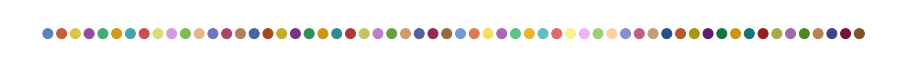

In [22]:
fig = plt.figure(figsize=(16,1))
plt.scatter(range(len(palette)), [1]*len(palette), c=palette, s=100)
plt.axis("off")
plt.show()

In [23]:
base_names = ["blue", "vermillion", "yellow", "purple", "green", "gold", "teal", "red", 
              "chartreuse", "lavendar", "lime", "orange", "indigo", "magenta", "brown"]
dark_names = ["dark_" + name for name in base_names]
light_names = ["light_" + name for name in base_names]
darker_names = ["darker_" + name for name in base_names]
palette_names = base_names + dark_names + light_names + darker_names
palette_names = ["nke_" + name for name in palette_names]
len(palette_names)

60

In [24]:
palette_names

['nke_blue',
 'nke_vermillion',
 'nke_yellow',
 'nke_purple',
 'nke_green',
 'nke_gold',
 'nke_teal',
 'nke_red',
 'nke_chartreuse',
 'nke_lavendar',
 'nke_lime',
 'nke_orange',
 'nke_indigo',
 'nke_magenta',
 'nke_brown',
 'nke_dark_blue',
 'nke_dark_vermillion',
 'nke_dark_yellow',
 'nke_dark_purple',
 'nke_dark_green',
 'nke_dark_gold',
 'nke_dark_teal',
 'nke_dark_red',
 'nke_dark_chartreuse',
 'nke_dark_lavendar',
 'nke_dark_lime',
 'nke_dark_orange',
 'nke_dark_indigo',
 'nke_dark_magenta',
 'nke_dark_brown',
 'nke_light_blue',
 'nke_light_vermillion',
 'nke_light_yellow',
 'nke_light_purple',
 'nke_light_green',
 'nke_light_gold',
 'nke_light_teal',
 'nke_light_red',
 'nke_light_chartreuse',
 'nke_light_lavendar',
 'nke_light_lime',
 'nke_light_orange',
 'nke_light_indigo',
 'nke_light_magenta',
 'nke_light_brown',
 'nke_darker_blue',
 'nke_darker_vermillion',
 'nke_darker_yellow',
 'nke_darker_purple',
 'nke_darker_green',
 'nke_darker_gold',
 'nke_darker_teal',
 'nke_darker_re

In [25]:
offsets = [int(v) for v in np.linspace(50, -50, 21)]
viewer_palettes = {}
for color, name in zip(palette, palette_names):
    color_gradient = []
    for offset in offsets:
        color_gradient.append(color_variant(color, brightness_offset=offset, return_format="hex"))
    viewer_palettes[name] = color_gradient
viewer_palettes

{'nke_blue': ['#8db3ef',
  '#88aeea',
  '#83a9e5',
  '#7ea4e0',
  '#799fdb',
  '#749ad6',
  '#6f95d1',
  '#6a90cc',
  '#658bc7',
  '#6086c2',
  '#5b81bd',
  '#567cb8',
  '#5177b3',
  '#4c72ae',
  '#476da9',
  '#4268a4',
  '#3d639f',
  '#385e9a',
  '#335995',
  '#2e5490',
  '#294f8b'],
 'nke_vermillion': ['#f39369',
  '#ee8e64',
  '#e9895f',
  '#e4845a',
  '#df7f55',
  '#da7a50',
  '#d5754b',
  '#d07046',
  '#cb6b41',
  '#c6663c',
  '#c16137',
  '#bc5c32',
  '#b7572d',
  '#b25228',
  '#ad4d23',
  '#a8481e',
  '#a34319',
  '#9e3e14',
  '#b9592f',
  '#b8582e',
  '#b7572d'],
 'nke_yellow': ['#fff679',
  '#fff174',
  '#ffec6f',
  '#ffe76a',
  '#fae265',
  '#f5dd60',
  '#f0d85b',
  '#ebd356',
  '#e6ce51',
  '#e1c94c',
  '#dcc447',
  '#d7bf42',
  '#d2ba3d',
  '#cdb538',
  '#c8b033',
  '#c3ab2e',
  '#bea629',
  '#b9a124',
  '#b49c1f',
  '#af971a',
  '#aa9215'],
 'nke_purple': ['#c47fd2',
  '#bf7acd',
  '#ba75c8',
  '#b570c3',
  '#b06bbe',
  '#ab66b9',
  '#a661b4',
  '#a15caf',
  '#9c57aa',
  '

## Plot word clouds of term lists

In [26]:
for k in range(2, n_colors + 1):
    lists, circuits = ontology.load_ontology(k, suffix=list_suffix)
    lists["DOMAIN"] = [k2name[k][i] for i in lists["CLUSTER"]]
    lists_ordered = pd.DataFrame()
    for name in k2name_ordered[k]:
        lists_ordered = lists_ordered.append(lists.loc[lists["DOMAIN"] == name])
    k_names = [name.upper().replace(" ", "_") for name in k2name_ordered[k]]
    lists_ordered["DOMAIN"] = [name.upper().replace(" ", "_") for name in lists_ordered["DOMAIN"]]
    ontology.plot_wordclouds("figures/lists/kvals{}", k_names, lists_ordered, metric="R", 
                             path="", suffix="/k{:02d}".format(k), palette=palette,
                             height=350, width=260, min_font_size=0, max_font_size=50,
                             brightness_offset=0.15, darkness_offset=-0.35, n_offsets=25,
                             print_fig=False)

## Plot brain maps of circuits

In [27]:
import os

In [28]:
atlas = utilities.load_atlas()
cmaps = style.colormaps["data-driven"] + style.colormaps["dsm"]

/anaconda3/envs/ontol/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


----------------------------------------------------------------------
k = 2
----------------------------------------------------------------------
AROUSAL              Min: 0.0000  Mean: 0.0456  Max: 0.3470


/anaconda3/envs/ontol/lib/python3.6/site-packages/nilearn/plotting/displays.py:1582: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


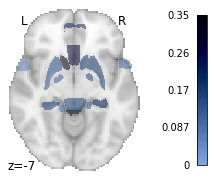

MANIPULATION         Min: 0.0000  Mean: 0.0262  Max: 0.1119


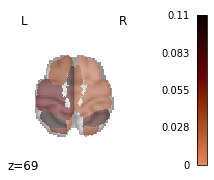

----------------------------------------------------------------------
k = 3
----------------------------------------------------------------------
AROUSAL              Min: 0.0000  Mean: 0.0602  Max: 0.4477


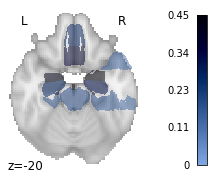

MANIPULATION         Min: 0.0000  Mean: 0.0192  Max: 0.1320


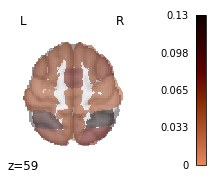

LANGUAGE             Min: 0.0000  Mean: 0.0358  Max: 0.3306


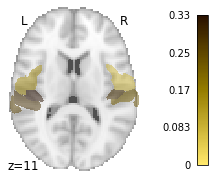

----------------------------------------------------------------------
k = 4
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0335  Max: 0.3109


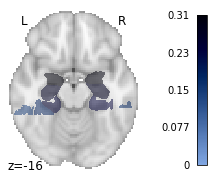

AROUSAL              Min: 0.0000  Mean: 0.0508  Max: 0.5243


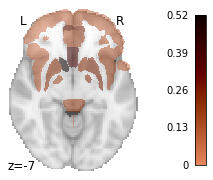

VISION               Min: 0.0000  Mean: 0.0284  Max: 0.1695


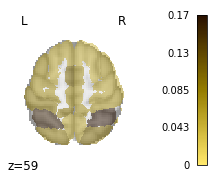

HEARING              Min: 0.0000  Mean: 0.0496  Max: 0.4733


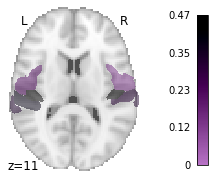

----------------------------------------------------------------------
k = 5
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0357  Max: 0.3881


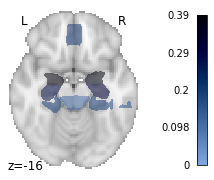

REWARD               Min: 0.0000  Mean: 0.0405  Max: 0.7556


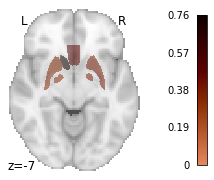

COGNITION            Min: 0.0000  Mean: 0.0219  Max: 0.1531


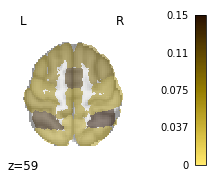

VISION               Min: 0.0000  Mean: 0.0235  Max: 0.2090


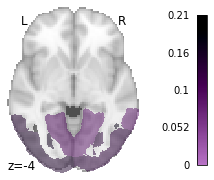

HEARING              Min: 0.0000  Mean: 0.0520  Max: 0.4908


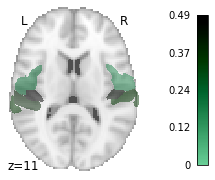

----------------------------------------------------------------------
k = 6
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0353  Max: 0.4084


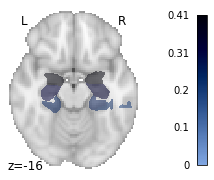

REWARD               Min: 0.0000  Mean: 0.0557  Max: 0.7754


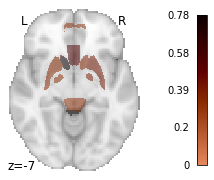

COGNITION            Min: 0.0000  Mean: 0.0076  Max: 0.0828


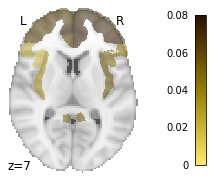

VISION               Min: 0.0000  Mean: 0.0224  Max: 0.1882


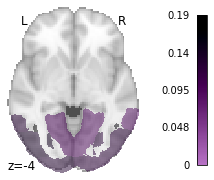

MANIPULATION         Min: 0.0000  Mean: 0.0284  Max: 0.2062


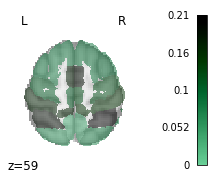

LANGUAGE             Min: 0.0000  Mean: 0.0407  Max: 0.3888


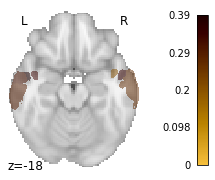

----------------------------------------------------------------------
k = 7
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0206  Max: 0.2951


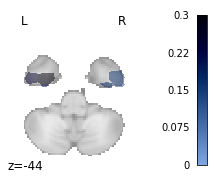

EMOTION              Min: 0.0000  Mean: 0.0250  Max: 0.5386


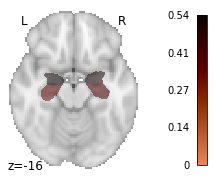

REWARD               Min: 0.0000  Mean: 0.0190  Max: 0.4869


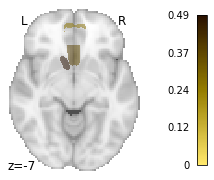

REACTION_TIME        Min: 0.0000  Mean: 0.0236  Max: 0.2098


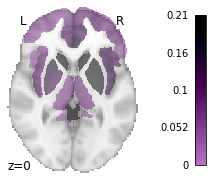

VISION               Min: 0.0000  Mean: 0.0290  Max: 0.2315


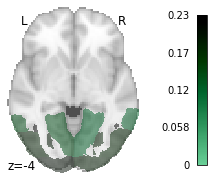

MANIPULATION         Min: 0.0000  Mean: 0.0333  Max: 0.2506


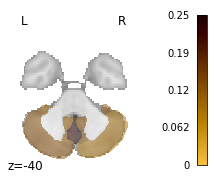

HEARING              Min: 0.0000  Mean: 0.0443  Max: 0.4981


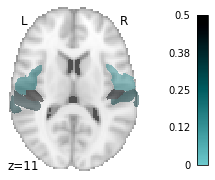

----------------------------------------------------------------------
k = 8
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0144  Max: 0.2774


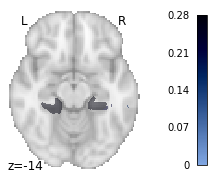

EMOTION              Min: 0.0000  Mean: 0.0252  Max: 0.6111


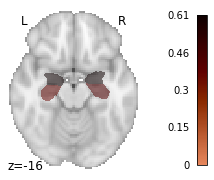

REWARD               Min: 0.0000  Mean: 0.0527  Max: 0.7837


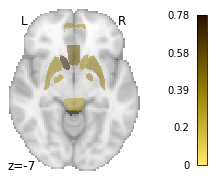

COGNITION            Min: 0.0000  Mean: 0.0104  Max: 0.1082


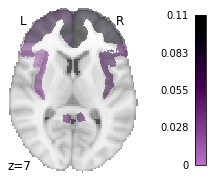

VISION               Min: 0.0000  Mean: 0.0294  Max: 0.2232


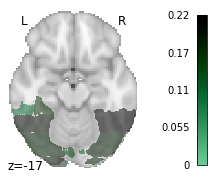

MANIPULATION         Min: 0.0000  Mean: 0.0246  Max: 0.1916


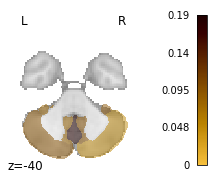

HEARING              Min: 0.0000  Mean: 0.0321  Max: 0.4794


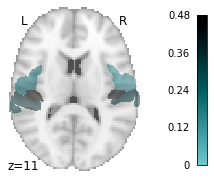

LANGUAGE             Min: 0.0000  Mean: 0.0184  Max: 0.3731


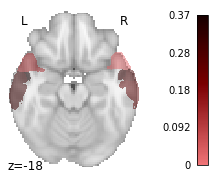

----------------------------------------------------------------------
k = 9
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0381  Max: 0.4933


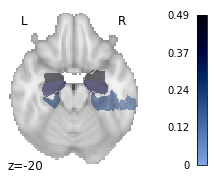

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0130  Max: 0.1391


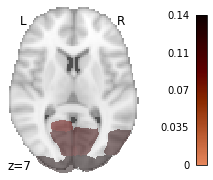

REWARD               Min: 0.0000  Mean: 0.0624  Max: 0.8995


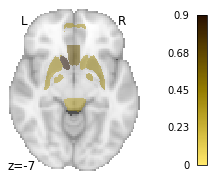

COGNITION            Min: 0.0000  Mean: 0.0118  Max: 0.1017


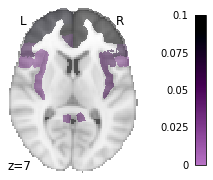

VISION               Min: 0.0000  Mean: 0.0117  Max: 0.1682


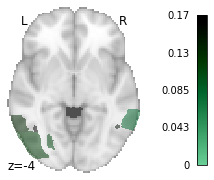

MANIPULATION         Min: 0.0000  Mean: 0.0157  Max: 0.2030


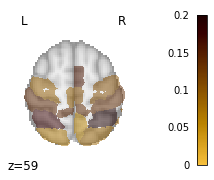

EXECUTION            Min: 0.0000  Mean: 0.0086  Max: 0.2540


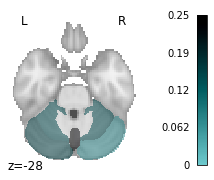

HEARING              Min: 0.0000  Mean: 0.0320  Max: 0.4672


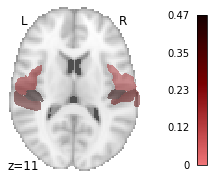

LANGUAGE             Min: 0.0000  Mean: 0.0207  Max: 0.4067


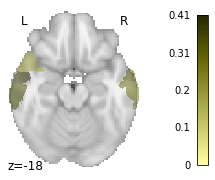

----------------------------------------------------------------------
k = 10
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0135  Max: 0.2956


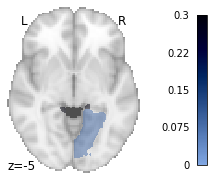

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0102  Max: 0.2705


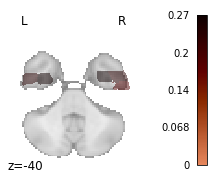

EMOTION              Min: 0.0000  Mean: 0.0255  Max: 0.6217


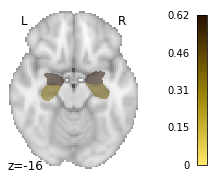

REWARD               Min: 0.0000  Mean: 0.0538  Max: 0.8059


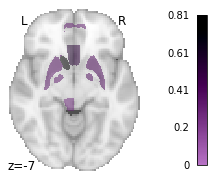

COGNITION            Min: 0.0000  Mean: 0.0101  Max: 0.1181


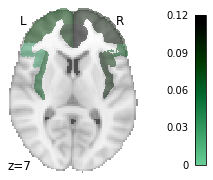

VISION               Min: 0.0000  Mean: 0.0258  Max: 0.2738


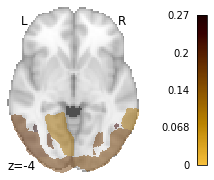

MANIPULATION         Min: 0.0000  Mean: 0.0185  Max: 0.1750


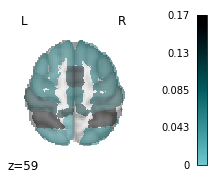

EXECUTION            Min: 0.0000  Mean: 0.0089  Max: 0.2552


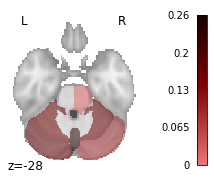

HEARING              Min: 0.0000  Mean: 0.0320  Max: 0.5278


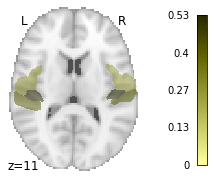

LANGUAGE             Min: 0.0000  Mean: 0.0169  Max: 0.3028


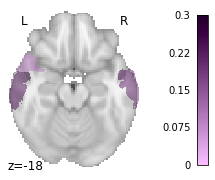

----------------------------------------------------------------------
k = 11
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0043  Max: 0.2660


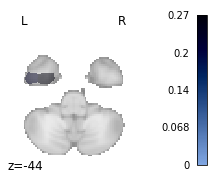

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0139  Max: 0.3381


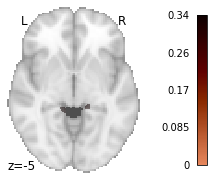

EMOTION              Min: 0.0000  Mean: 0.0136  Max: 0.4542


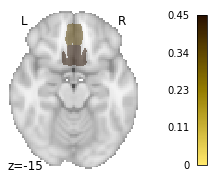

REWARD               Min: 0.0000  Mean: 0.0129  Max: 0.7682


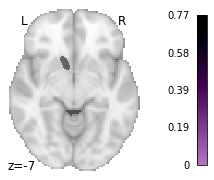

AROUSAL              Min: 0.0000  Mean: 0.0226  Max: 0.5548


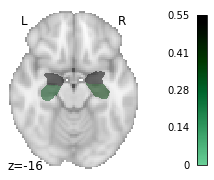

REACTION_TIME        Min: 0.0000  Mean: 0.0260  Max: 0.2317


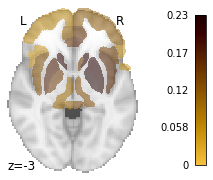

VISION               Min: 0.0000  Mean: 0.0153  Max: 0.1387


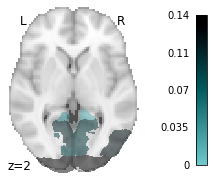

MANIPULATION         Min: 0.0000  Mean: 0.0260  Max: 0.2177


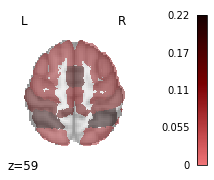

PERCEPTION           Min: 0.0000  Mean: 0.0273  Max: 0.4055


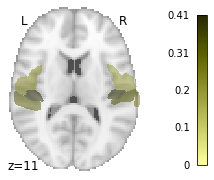

LANGUAGE             Min: 0.0000  Mean: 0.0151  Max: 0.3154


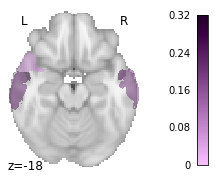

WORD                 Min: 0.0000  Mean: 0.0129  Max: 0.2419


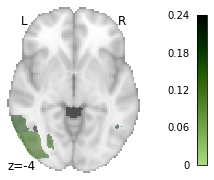

----------------------------------------------------------------------
k = 12
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0230  Max: 0.3676


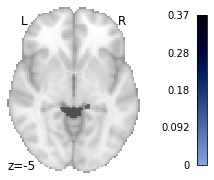

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0109  Max: 0.1539


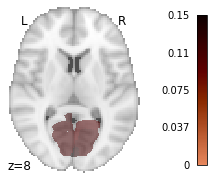

EMOTION              Min: 0.0000  Mean: 0.0252  Max: 0.6087


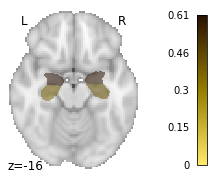

REWARD               Min: 0.0000  Mean: 0.0152  Max: 0.6763


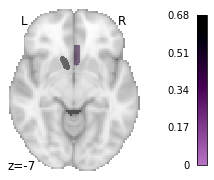

ANTICIPATION         Min: 0.0000  Mean: 0.0251  Max: 0.5292


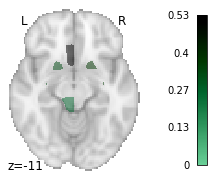

REACTION_TIME        Min: 0.0000  Mean: 0.0169  Max: 0.2201


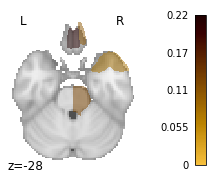

REPRESENTATION       Min: 0.0000  Mean: 0.0153  Max: 0.1756


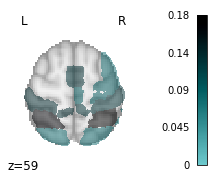

VISION               Min: 0.0000  Mean: 0.0212  Max: 0.2447


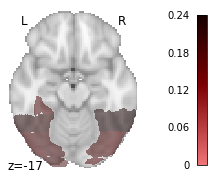

MANIPULATION         Min: 0.0000  Mean: 0.0065  Max: 0.1486


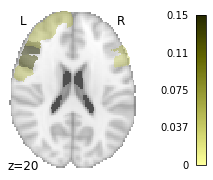

EXECUTION            Min: 0.0000  Mean: 0.0090  Max: 0.2546


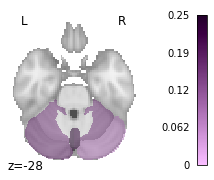

HEARING              Min: 0.0000  Mean: 0.0181  Max: 0.3342


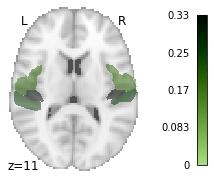

LANGUAGE             Min: 0.0000  Mean: 0.0205  Max: 0.3280


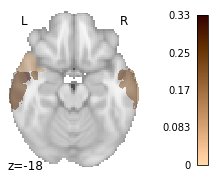

----------------------------------------------------------------------
k = 13
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0172  Max: 0.3679


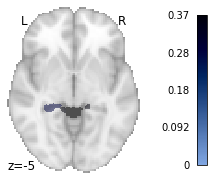

RECOGNITION          Min: 0.0000  Mean: 0.0175  Max: 0.1771


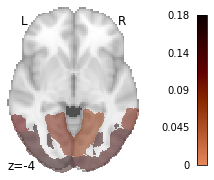

RETRIEVAL            Min: 0.0000  Mean: 0.0096  Max: 0.3480


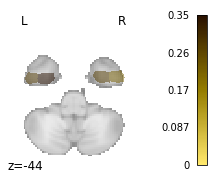

EMOTION              Min: 0.0000  Mean: 0.0137  Max: 0.4528


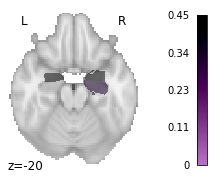

REWARD               Min: 0.0000  Mean: 0.0127  Max: 0.7563


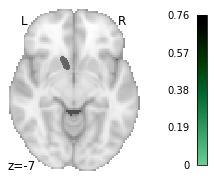

AROUSAL              Min: 0.0000  Mean: 0.0137  Max: 0.4544


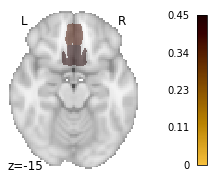

ANTICIPATION         Min: 0.0000  Mean: 0.0262  Max: 0.3284


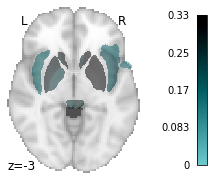

COGNITION            Min: 0.0000  Mean: 0.0069  Max: 0.1345


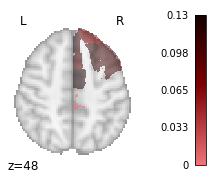

VISION               Min: 0.0000  Mean: 0.0141  Max: 0.1829


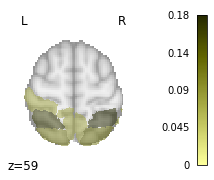

MANIPULATION         Min: 0.0000  Mean: 0.0068  Max: 0.1470


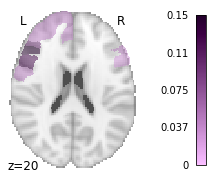

EXECUTION            Min: 0.0000  Mean: 0.0095  Max: 0.2672


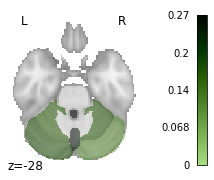

HEARING              Min: 0.0000  Mean: 0.0348  Max: 0.5387


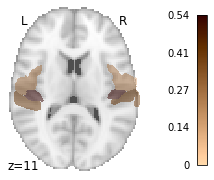

LANGUAGE             Min: 0.0000  Mean: 0.0184  Max: 0.3272


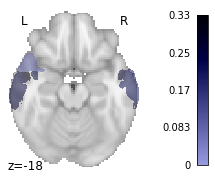

----------------------------------------------------------------------
k = 14
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0109  Max: 0.2178


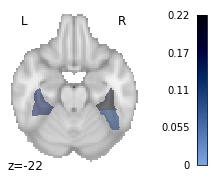

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0054  Max: 0.2635


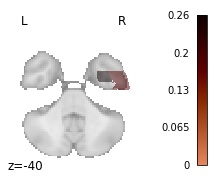

RETRIEVAL            Min: 0.0000  Mean: 0.0045  Max: 0.2854


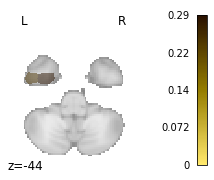

EMOTION              Min: 0.0000  Mean: 0.0150  Max: 0.4959


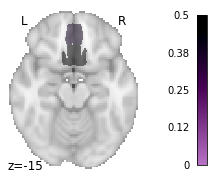

VALENCE              Min: 0.0000  Mean: 0.0280  Max: 0.5255


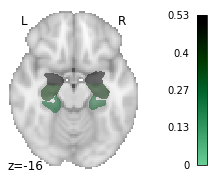

REWARD               Min: 0.0000  Mean: 0.0340  Max: 0.8157


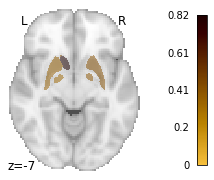

REACTION_TIME        Min: 0.0000  Mean: 0.0135  Max: 0.1770


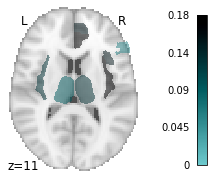

COGNITION            Min: 0.0000  Mean: 0.0076  Max: 0.1079


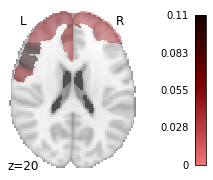

VISION               Min: 0.0000  Mean: 0.0154  Max: 0.2406


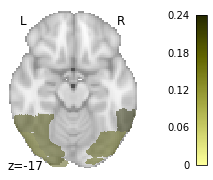

MANIPULATION         Min: 0.0000  Mean: 0.0194  Max: 0.2541


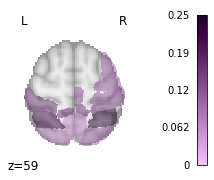

EXECUTION            Min: 0.0000  Mean: 0.0097  Max: 0.2782


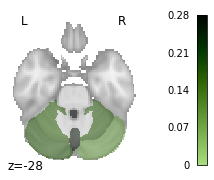

LANGUAGE             Min: 0.0000  Mean: 0.0281  Max: 0.3729


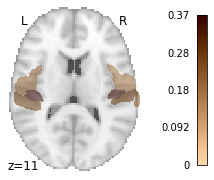

WORD                 Min: 0.0000  Mean: 0.0086  Max: 0.2589


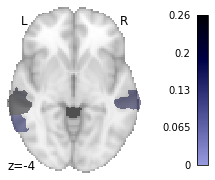

MEANING              Min: 0.0000  Mean: 0.0087  Max: 0.3965


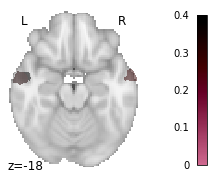

----------------------------------------------------------------------
k = 15
----------------------------------------------------------------------
MEMORY               Min: 0.0000  Mean: 0.0064  Max: 0.2218


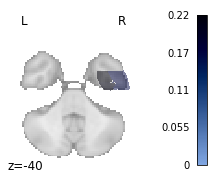

EPISODIC_MEMORY      Min: 0.0000  Mean: 0.0097  Max: 0.3432


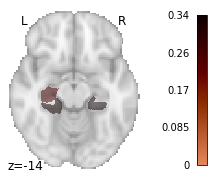

RECALL               Min: 0.0000  Mean: 0.0072  Max: 0.1346


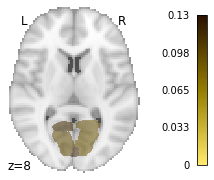

EMOTION              Min: 0.0000  Mean: 0.0141  Max: 0.4644


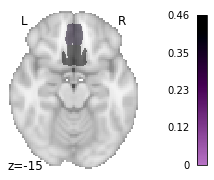

REWARD               Min: 0.0000  Mean: 0.0180  Max: 0.3835


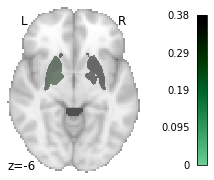

DECISION_MAKING      Min: 0.0000  Mean: 0.0132  Max: 0.7805


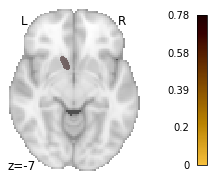

AROUSAL              Min: 0.0000  Mean: 0.0175  Max: 0.4778


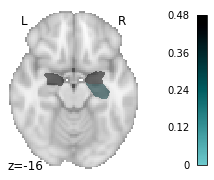

COGNITION            Min: 0.0000  Mean: 0.0107  Max: 0.1116


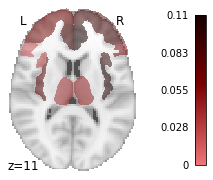

VISION               Min: 0.0000  Mean: 0.0111  Max: 0.2259


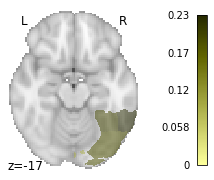

MANIPULATION         Min: 0.0000  Mean: 0.0221  Max: 0.2071


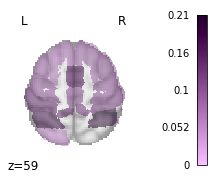

EXECUTION            Min: 0.0000  Mean: 0.0095  Max: 0.2799


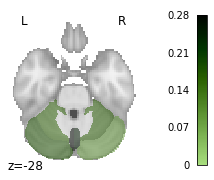

HEARING              Min: 0.0000  Mean: 0.0341  Max: 0.5581


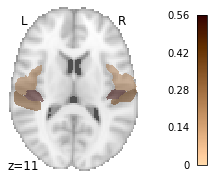

LANGUAGE             Min: 0.0000  Mean: 0.0169  Max: 0.3231


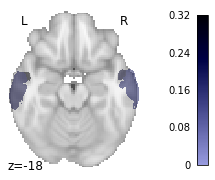

WORD                 Min: 0.0000  Mean: 0.0122  Max: 0.2567


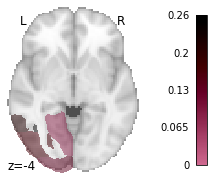

MEANING              Min: 0.0000  Mean: 0.0047  Max: 0.1942


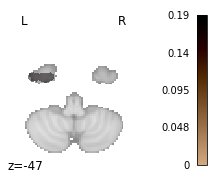

In [29]:
for k in range(2, n_colors + 1):
    
    print("-" * 70 + "\nk = {}\n".format(k) + "-" * 70)
    
    path = "figures/circuits/kvals_lr/k{:02}".format(k)
    if not os.path.exists(path):
        os.makedirs(path)
    
    lists, circuits = ontology.load_ontology(k, suffix=list_suffix)
    scores = utilities.score_lists(lists, dtm_bin, label_var="DOMAIN").loc[act_bin.index]
    
    pmi = ontology.compute_cooccurrences(act_bin, scores, positive=True)
    pmi = ontology.threshold_pmi_by_circuits(pmi, circuits, label_var="DOMAIN")
    
    pmi.columns = [str(column) for column in pmi.columns]
    k_names = [name.upper().replace(" ", "_") for name in k2name_ordered[k]]
    pmi = pmi[k_names]
    
    vmaxs = [round(v, 2) for v in pmi.max()]
    
    utilities.map_plane(pmi, atlas, path, suffix="_z", cmaps=cmaps, vmaxs=vmaxs, cut_coords=1,
                        plane="z", cbar=True, verbose=True, print_fig=True)

# Export the results

## File structure

In [30]:
for k in circuit_counts:
    path = "../../nke-viewer/data/k{:02d}".format(k)
    if not os.path.exists(path):
        os.mkdir(path)

## Word lists

In [31]:
for k in circuit_counts:
    lists, _ = ontology.load_ontology(k, suffix=suffix)
    lists["DOMAIN"] = [k2name[k][i] for i in lists["CLUSTER"]]
    lists["CLUSTER"] = [k2name_ordered[k].index(dom) + 1 for dom in lists["DOMAIN"]]
    lists_ordered = pd.DataFrame()
    for name in k2name_ordered[k]:
        lists_ordered = lists_ordered.append(lists.loc[lists["DOMAIN"] == name])
    lists = lists.sort_values(["CLUSTER", "R"], ascending=[True, False])
    file = "../../nke-viewer/data/k{:02d}/words_k{:02d}.csv".format(k, k)
    lists.to_csv(file, index=None)

## Brain circuits

In [32]:
from nilearn import image, plotting
from statsmodels.stats.multitest import multipletests

In [33]:
def load_atlas_2mm(cerebellum="combo"):

    import numpy as np
    from nilearn import image

    cer = "../data/brain/atlases/Cerebellum-MNIfnirt-maxprob-thr25-2mm.nii.gz"
    cor = "../data/brain/atlases/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz"
    sub = "../data/brain/atlases/HarvardOxford-sub-maxprob-thr25-2mm.nii.gz"

    sub_del_dic = {1:0, 2:0, 3:0, 12:0, 13:0, 14:0}
    sub_lab_dic_L = {4:1, 5:2, 6:3, 7:4, 9:5, 10:6, 11:7, 8:8}
    sub_lab_dic_R = {15:1, 16:2, 17:3, 18:4, 19:5, 20:6, 21:7, 7:8}

    sub_mat_L = image.load_img(sub).get_data()[46:,:,:]
    sub_mat_R = image.load_img(sub).get_data()[:46,:,:]

    for old, new in sub_del_dic.items():
        sub_mat_L[sub_mat_L == old] = new
    for old, new in sub_lab_dic_L.items():
        sub_mat_L[sub_mat_L == old] = new
    sub_mat_L = sub_mat_L + 48
    sub_mat_L[sub_mat_L == 48] = 0

    for old, new in sub_del_dic.items():
        sub_mat_R[sub_mat_R == old] = new
    for old, new in sub_lab_dic_R.items():
        sub_mat_R[sub_mat_R == old] = new
    sub_mat_R = sub_mat_R + 48
    sub_mat_R[sub_mat_R == 48] = 0

    cor_mat_L = image.load_img(cor).get_data()[46:,:,:]
    cor_mat_R = image.load_img(cor).get_data()[:46,:,:]

    mat_L = np.add(sub_mat_L, cor_mat_L)
    mat_L[mat_L > 56] = 0
    mat_R = np.add(sub_mat_R, cor_mat_R)
    mat_R[mat_R > 56] = 0
    
    if cerebellum == "combo":
        mat_R = mat_R + 59
        mat_R[mat_R > 118] = 0
        mat_R[mat_R < 60] = 0

    elif cerebellum == "seg":
        mat_R = mat_R + 74
        mat_R[mat_R > 148] = 0
        mat_R[mat_R < 75] = 0

    cer_mat_L = image.load_img(cer).get_data()[46:,:,:]
    cer_mat_R = image.load_img(cer).get_data()[:46,:,:]

    if cerebellum == "combo":
        cer_mat_L[np.isin(cer_mat_L,[1,3,5,14,17,20,23,26])] = 57
        cer_mat_L[np.isin(cer_mat_L,[8,11])] = 58
        cer_mat_L[np.isin(cer_mat_L,[6,9,12,15,18,21,24,27])] = 59
        cer_mat_R[np.isin(cer_mat_R,[2,4,7,16,19,22,25,28])] = 116
        cer_mat_R[np.isin(cer_mat_R,[10,13])] = 117
        cer_mat_R[np.isin(cer_mat_R,[6,9,12,15,18,21,24,27])] = 118

        mat_L = np.add(mat_L, cer_mat_L)
        mat_L[mat_L > 59] = 0
        mat_R = np.add(mat_R, cer_mat_R)
        mat_R[mat_R > 118] = 0

    elif cerebellum == "seg":
        cer_mat_L[cer_mat_L == 1] = 57
        cer_mat_L[cer_mat_L == 3] = 58
        cer_mat_L[cer_mat_L == 5] = 59
        cer_mat_L[cer_mat_L == 6] = 69
        cer_mat_L[cer_mat_L == 8] = 65
        cer_mat_L[cer_mat_L == 9] = 67
        cer_mat_L[cer_mat_L == 11] = 66
        cer_mat_L[cer_mat_L == 12] = 68
        cer_mat_L[cer_mat_L == 14] = 60
        cer_mat_L[cer_mat_L == 15] = 70
        cer_mat_L[cer_mat_L == 17] = 61
        cer_mat_L[cer_mat_L == 18] = 71
        cer_mat_L[cer_mat_L == 20] = 62
        cer_mat_L[cer_mat_L == 21] = 72
        cer_mat_L[cer_mat_L == 23] = 63
        cer_mat_L[cer_mat_L == 24] = 73
        cer_mat_L[cer_mat_L == 26] = 64
        cer_mat_L[cer_mat_L == 27] = 74

        cer_mat_R[cer_mat_R == 2] = 131
        cer_mat_R[cer_mat_R == 4] = 132
        cer_mat_R[cer_mat_R == 6] = 143
        cer_mat_R[cer_mat_R == 7] = 133
        cer_mat_R[cer_mat_R == 9] = 141
        cer_mat_R[cer_mat_R == 10] = 139
        cer_mat_R[cer_mat_R == 12] = 142
        cer_mat_R[cer_mat_R == 13] = 140
        cer_mat_R[cer_mat_R == 15] = 144
        cer_mat_R[cer_mat_R == 16] = 134
        cer_mat_R[cer_mat_R == 18] = 145
        cer_mat_R[cer_mat_R == 19] = 135
        cer_mat_R[cer_mat_R == 21] = 146
        cer_mat_R[cer_mat_R == 22] = 136
        cer_mat_R[cer_mat_R == 24] = 147
        cer_mat_R[cer_mat_R == 25] = 137
        cer_mat_R[cer_mat_R == 27] = 148
        cer_mat_R[cer_mat_R == 28] = 138

        mat_L = np.add(mat_L, cer_mat_L)
        mat_L[mat_L > 75] = 0
        mat_R = np.add(mat_R, cer_mat_R)
        mat_R[mat_R > 148] = 0

    mat = np.concatenate((mat_R, mat_L), axis=0)
    atlas_image = image.new_img_like(sub, mat)

    return atlas_image

In [34]:
atlas_2mm = load_atlas_2mm()

In [35]:
for k in circuit_counts:
    print("Processing k={:02d}".format(k))
    lists, circuits = ontology.load_ontology(k, suffix=suffix)
    scores = utilities.score_lists(lists, dtm_bin, label_var="CLUSTER").loc[act_bin.index]
    pmi = ontology.compute_cooccurrences(act_bin, scores, positive=True)
    pmi = ontology.threshold_pmi_by_circuits(pmi, circuits, label_var="CLUSTER")
    
    for f, feature in enumerate(k2order[k]):
        stat_map = image.copy_img(atlas_2mm).get_data()
        data = pmi[feature]
        for i, value in enumerate(data):
            stat_map[stat_map == i+1] = value
        stat_img = image.new_img_like(atlas_2mm, stat_map)
        
        img_file = "../../nke-viewer/data/k{:02d}/circuit_k{:02d}_dom{:02d}.nii.gz".format(k, k, f+1)
        stat_img.to_filename(img_file)

Processing k=02
Processing k=03
Processing k=04
Processing k=05
Processing k=06
Processing k=07
Processing k=08
Processing k=09
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20
Processing k=21
Processing k=22
Processing k=23
Processing k=24
Processing k=25
Processing k=26
Processing k=27
Processing k=28
Processing k=29
Processing k=30
Processing k=31
Processing k=32
Processing k=33
Processing k=34
Processing k=35
Processing k=36
Processing k=37
Processing k=38
Processing k=39
Processing k=40
Processing k=41
Processing k=42
Processing k=43
Processing k=44
Processing k=45
Processing k=46
Processing k=47
Processing k=48
Processing k=49
Processing k=50
